[View in Colaboratory](https://colab.research.google.com/github/vincentei/Python_aux/blob/master/python_examples.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import pytz
import time

In [0]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

## Numpy

In [3]:
# creating numpy arrays with dimension (3,2) and (2,4) , (n,m) * (m,k)
A = np.array([[1,2], [3,4],[5,6]])
B = np.array([[1,2,3,4], [5,6,7,8]])
print (A.shape)
print (B.shape)

(3, 2)
(2, 4)


In [270]:
# calc multiply two matrices, dot product between two matrices
C = np.matmul(A,B)
print (C.shape)

(3, 4)


In [271]:
# create numpy array with range from 1 to 10, then reshape into (2,5) matrix
a = np.arange(1,11)
print (a)
A = a.reshape(2,5)
print (A)

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [0]:
# now create (2,3) random numpy with same seed
np.random.seed(42)
A = np.random.randn(3,10)

In [273]:
# concatenate two arrays
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.concatenate([a,b]))

[1 2 3 4 5 6]


In [274]:
# concatenate two matrices
a = np.array([[1,2,3],[3,4,3]])
b = np.array([[1,2,3],[3,4,3]])
c = np.concatenate([a,b])
d = np.concatenate([a,b],axis=1)
print(c.shape)
print(d.shape)

(4, 3)
(2, 6)


In [275]:
# sum two arrays
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a + b)

[5 7 9]


In [276]:
# clipping (ie squash value of numpy array between min, max)
a = np.arange(6)
print (a)
print (np.clip(a,2,4))

[0 1 2 3 4 5]
[2 2 2 3 4 4]


In [277]:
# sample idx from distribution
h = np.array([0.1, 0.2, 0.5,0.2])
#index = np.random.choice([0, 1, 2, 3], p = h.ravel())
#print(index)
index2 = np.random.choice(np.arange(len(h)), p = h.ravel())
print(index2)

2


In [278]:
# give index of max value in numpy array
a = np.array([1,33,4,5])
print(np.argmax(a))

1


In [279]:
# give index of max value in 2d numpy array
a = np.array([[1,33,4,5],[1,2,3,44]])
print(np.argmax(a))
print(np.argmax(a,axis=0))
print(np.argmax(a,axis=1))
print(np.argmax(a,axis=-1)) #-1 impies the last axis

7
[0 0 0 1]
[1 3]
[1 3]


## Dictionary

In [0]:
# create dict
mydict = {'ali':178,'johan':'188','Doei':'48'}

In [281]:
# how many element are in my dict?
len(mydict)

3

## Plotting

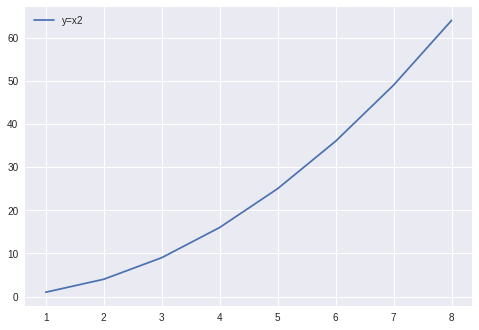

In [282]:
# make plot of two numpy arrays
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([1,4,9,16,25,36,49,64])
plt.plot(x,y,label = 'y=x2')
plt.legend()
plt.show()

## Other stuff

In [283]:
# the modulo operator, the remainder from division
2 % 300

2

In [0]:
TESTDATA = StringIO("""col1;col2;col3
    1;4.4;99
    2;4.5;200
    3;4.7;65
    4;3.2;140
    """)

df = pd.read_csv(TESTDATA, sep=";")

## Dataframe

In [0]:
# Create dataframe
df = pd.DataFrame({'a':[1,2,3],'b':[3,4,5]})

In [286]:
# dataframe from numpy array
names = ['apple','orange','apple','banana']
price = [1,2,5,10]
df = pd.DataFrame({'names':names,'price':price})
df.head()

,names,price
0,apple,1
1,orange,2
2,apple,5
3,banana,10


In [287]:
# make new column price_sqr using the apply function
df['price_sqr'] = df['price'].apply(lambda x: x*x)
df.head()

,names,price,price_sqr
0,apple,1,1
1,orange,2,4
2,apple,5,25
3,banana,10,100


In [288]:
# add 10 to price of apple
idx = df['names'] == 'apple'
df.loc[idx,'price'] = df.loc[idx,'price'] + 10
df.head()

,names,price,price_sqr
0,apple,11,1
1,orange,2,4
2,apple,15,25
3,banana,10,100


In [289]:
# rename column
df.rename(columns = {'names':'name'},inplace=True)
df.head()

,name,price,price_sqr
0,apple,11,1
1,orange,2,4
2,apple,15,25
3,banana,10,100


In [290]:
# sort by name
df =df.sort_values(by=['name','price'])
df.tail(10)

,name,price,price_sqr
0,apple,11,1
2,apple,15,25
3,banana,10,100
1,orange,2,4


### Multiple dataframes

In [308]:
# concatenate multiple df's into one
df1 = pd.DataFrame({'a':[1,2,3],'b':[3,4,5]})
df2 = pd.DataFrame({'a':[10,20,30],'b':[30,40,50]})

df_all =[]

df_all.append(df1)
df_all.append(df2)

df_all = pd.concat(df_all)
df_all.head()

,a,b
0,1,3
1,2,4
2,3,5
0,10,30
1,20,40


In [309]:
# reset the index, do not insert the index as a column into the df
df_all.reset_index(inplace=True,drop=True)
df_all.head()

,a,b
0,1,3
1,2,4
2,3,5
3,10,30
4,20,40


### Groupby

In [26]:
# dataframe from numpy array
name = ['apple','orange','apple','banana','banana']
price = [1,2,5,10,20]
weight = [6,7,10,15,25]
df = pd.DataFrame({'name':name,'price':price,'weight':weight})
df.head()

,name,price,weight
0,apple,1,6
1,orange,2,7
2,apple,5,10
3,banana,10,15
4,banana,20,25


In [18]:
# group by fruit and calc the average price, 
df_grp = df.groupby(['name'])['price'].mean() # this will return a pandas series 
print(df_grp)
print(type(df_grp))

name
apple      3
banana    15
orange     2
Name: price, dtype: int64
<class 'pandas.core.series.Series'>


In [20]:
# groupby fruit and calc the average price
df_grp = df.groupby(['name'])[['price','weight']].mean() # will return a df with index equal to the group
print(df_grp)
print(type(df_grp))

        price  weight
name                 
apple       3       8
banana     15      20
orange      2       7
<class 'pandas.core.frame.DataFrame'>


In [22]:
# groupby fruit but make a new index
df_grp = df.groupby(['name'],as_index=False)[['price','weight']].mean() # will return a df with index equal to the group
print(df_grp)
print(type(df_grp))

     name  price  weight
0   apple      3       8
1  banana     15      20
2  orange      2       7
<class 'pandas.core.frame.DataFrame'>


In [0]:
# now let's make a used defined function to groupby
# Volume Weighted Average Price
def vwap(x):
    return (x['weight'] * x['price']).sum() / x['weight'].sum()

In [32]:
# calc the volume weighted price
df_group = pd.DataFrame(df.groupby(['name']).apply(lambda x: vwap(x)))
df_group.head()

,0
name,
apple,3
banana,16
orange,2


In [34]:
# the column is messed up so correct this
df_group.rename(columns={ df_group.columns[0]: "vwap" }, inplace = True)
df_group.head()

,vwap
name,
apple,3
banana,16
orange,2


In [16]:
# you can also use the describe function on the group
# reference https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
df.groupby(['name'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
apple,2.0,3.0,2.828427,1.0,2.0,3.0,4.0,5.0
banana,2.0,15.0,7.071068,10.0,12.5,15.0,17.5,20.0
orange,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0


### Indices

In [37]:
# check whether elements of pandas series are in list
df = pd.DataFrame({'name':['Apple','Banana','Citrus','Appel']})
idx = df['name'].isin(['Apple','Banana'])
print(idx)

0     True
1     True
2    False
3    False
Name: name, dtype: bool


## Apply and Map

In [291]:
# make new column using the map function
# http://book.pythontips.com/en/latest/map_filter.html
df['price_sqr_map'] = list(map(lambda x: x**2, df['price']))
df.head()

,name,price,price_sqr,price_sqr_map
0,apple,11,1,121
2,apple,15,25,225
3,banana,10,100,100
1,orange,2,4,4


In [292]:
# make new column using the map function, add price + price_sqr
# http://pythonfiddle.com/map-with-multiple-arguments/
df['price_sqr_map2'] = list(map(lambda x,y: x+y, df['price'],df['price_sqr']))
df.head()

,name,price,price_sqr,price_sqr_map,price_sqr_map2
0,apple,11,1,121,12
2,apple,15,25,225,40
3,banana,10,100,100,110
1,orange,2,4,4,6


## Dates

### General

In [293]:
# create datetime object
a = dt.datetime(2018,5,9,0,0) # constructor, a datetime object a is created 
b = dt.datetime.today() # constructor
c = dt.date(2018,10,28)
print(a)
print (b)
print(c)

2018-05-09 00:00:00
2018-05-06 19:47:26.891915
2018-10-28


In [294]:
# the object has several attributes
print (a.year)
print (a.month)
print(a.date())
print(a.isoweekday())

2018
5
2018-05-09
3


In [295]:
# Conversely, the datetime.strptime() class method creates a datetime object from a string representing a date and time and a corresponding format string
a = dt.datetime.strptime('2018-05-09',"%Y-%m-%d")
print(a)

2018-05-09 00:00:00


In [296]:
# convert to string with format
print(a.strftime("%Y-%m-%d"))
print(a.strftime("%Y%m%d"))
print(type(a.strftime("%Y%m%d")))

2018-05-09
20180509
<type 'str'>


In [297]:
# make dataframe with only index

startdate=dt.datetime(2018,1,1,0,0)
enddate=dt.datetime(2018,12,31,23,59)

delivery_date = pd.date_range(startdate,enddate,freq='1H',tz='Europe/Amsterdam')
df = pd.DataFrame(index = delivery_date) 
df.reset_index(inplace=True)
df.rename(columns={'index':'delivery_date'},inplace=True)
print(df.tail(2))

                 delivery_date
8758 2018-12-31 22:00:00+01:00
8759 2018-12-31 23:00:00+01:00


In [298]:
# convert datetime to date
df['date'] = df['delivery_date'].apply(lambda x: x.date())
print(df.tail(2))

                 delivery_date        date
8758 2018-12-31 22:00:00+01:00  2018-12-31
8759 2018-12-31 23:00:00+01:00  2018-12-31


In [299]:
# convert to utc
df.index = df['delivery_date'] 
df.index = df.index.tz_convert('UTC') # tz_convert only works on index, as index is unique
df['delivery_date_utc'] = df.index
df.tail(2)

,delivery_date,date,delivery_date_utc
delivery_date,,,
2018-12-31 21:00:00+00:00,2018-12-31 22:00:00+01:00,2018-12-31,2018-12-31 21:00:00+00:00
2018-12-31 22:00:00+00:00,2018-12-31 23:00:00+01:00,2018-12-31,2018-12-31 22:00:00+00:00


In [300]:
idx = df['date']==dt.date(2018,10,28)
df[idx].head(5)

,delivery_date,date,delivery_date_utc
delivery_date,,,
2018-10-27 22:00:00+00:00,2018-10-28 00:00:00+02:00,2018-10-28,2018-10-27 22:00:00+00:00
2018-10-27 23:00:00+00:00,2018-10-28 01:00:00+02:00,2018-10-28,2018-10-27 23:00:00+00:00
2018-10-28 00:00:00+00:00,2018-10-28 02:00:00+02:00,2018-10-28,2018-10-28 00:00:00+00:00
2018-10-28 01:00:00+00:00,2018-10-28 02:00:00+01:00,2018-10-28,2018-10-28 01:00:00+00:00
2018-10-28 02:00:00+00:00,2018-10-28 03:00:00+01:00,2018-10-28,2018-10-28 02:00:00+00:00


In [301]:
# now make a timezone aware
a = dt.datetime(2018,5,9,0,0) # constructor, a datetime object a is created 
tzinfo = pytz.timezone('Europe/Amsterdam')
b = tzinfo.localize(a)
print (b)

2018-05-09 00:00:00+02:00


In [302]:
print (dt.datetime.today())

2018-05-06 19:47:31.531298


### Example Tennet data

In [303]:
date_start = dt.date(2017,1,1).strftime("%d-%m-%Y")
date_end = dt.date(2017,12,31).strftime("%d-%m-%Y")
tennet_url = "http://www.tennet.org/bedrijfsvoering/ExporteerData.aspx?exporttype=verrekenprijzen&format=csv&datefrom={}&dateto={}&submit=1".format(date_start, date_end)

cols = ['datum', 'PTE', 'periode_van','periode_tm','Afnemen','invoeden']

df_prices = pd.read_csv(tennet_url,usecols=cols,decimal=',')
df_prices.head(3)

,datum,PTE,periode_van,periode_tm,Afnemen,invoeden
0,01-01-2017,1,00:00,00:15,250.00,-200.00
1,01-01-2017,2,00:15,00:30,250.00,250.00
2,01-01-2017,3,00:30,00:45,33.56,33.56


In [304]:
col2drop = ['periode_tm']
df_prices.drop(col2drop,axis=1,inplace=True)
df_prices.head(3)

,datum,PTE,periode_van,Afnemen,invoeden
0,01-01-2017,1,00:00,250.00,-200.00
1,01-01-2017,2,00:15,250.00,250.00
2,01-01-2017,3,00:30,33.56,33.56


In [305]:
# convert datetime to utc
amsterdam = pytz.timezone('Europe/Amsterdam')
df_prices.index = pd.to_datetime(df_prices['datum'] + " " + df_prices['periode_van'],format='%d-%m-%Y %H:%M')
df_prices.index = df_prices.index.tz_localize(amsterdam, ambiguous='infer')

# save local date in column so the index can be converted
df_prices['datetime_local'] = df_prices.index
df_prices.index = df_prices.index.tz_convert('UTC')
df_prices.head(3)

,datum,PTE,periode_van,Afnemen,invoeden,datetime_local
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00


In [312]:
# round/truncate datetime by replacing the minute by zero
t0 = time.time()

df_prices['datetime_local_trunc'] = df_prices['datetime_local'].apply(lambda x: x.replace(minute=0))

t1 = time.time()

print(t1-t0)

df_prices.head(3)

0.816968917847


,datum,PTE,periode_van,Afnemen,invoeden,datetime_local,datetime_local_trunc
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00,2017-01-01 00:00:00+01:00


In [313]:
# round/truncate datetime by replacing the minute by zero
t0 = time.time()

df_prices['datetime_local_trunc2'] = list(map(lambda x: x.replace(minute=0), df_prices['datetime_local']))

t1 = time.time()

print(t1-t0)

df_prices.head(3)

0.787879943848


,datum,PTE,periode_van,Afnemen,invoeden,datetime_local,datetime_local_trunc,datetime_local_trunc2
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00


In [4]:
1/0

ZeroDivisionError: ignored